In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, matthews_corrcoef


In [6]:
df = pd.read_csv(r'/content/wdbc.data',header=None)
df.columns = ["ID",
    "Diagnosis",
    "radius1",
    "texture1",
    "perimeter1",
    "area1",
    "smoothness1",
    "compactness1",
    "concavity1",
    "concave_points1",
    "symmetry1",
    "fractal_dimension1",
    "radius2",
    "texture2",
    "perimeter2",
    "area2",
    "smoothness2",
    "compactness2",
    "concavity2",
    "concave_points2",
    "symmetry2",
    "fractal_dimension2",
    "radius3",
    "texture3",
    "perimeter3",
    "area3",
    "smoothness3",
    "compactness3",
    "concavity3",
    "concave_points3",
    "symmetry3",
    "fractal_dimension3"]

In [7]:
df.isnull().sum()

,0
ID,0
Diagnosis,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0


In [10]:
df.head(2)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


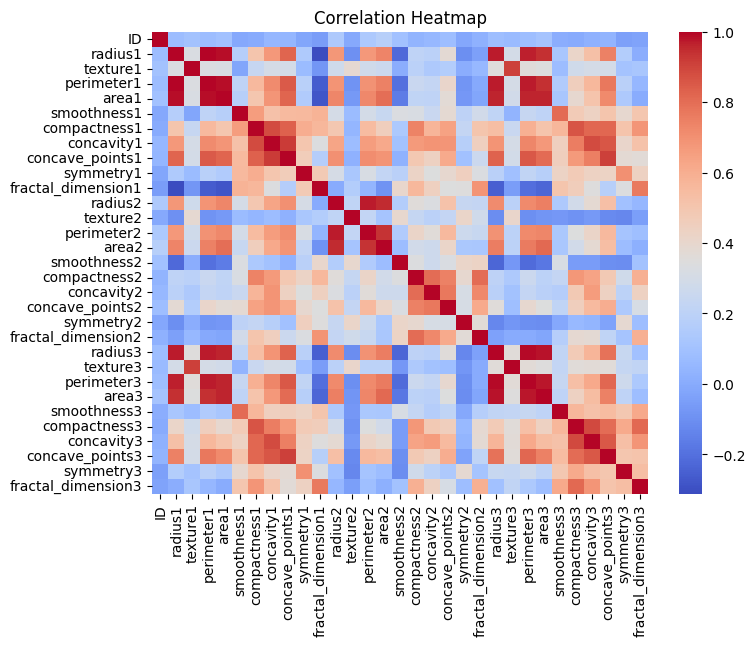

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


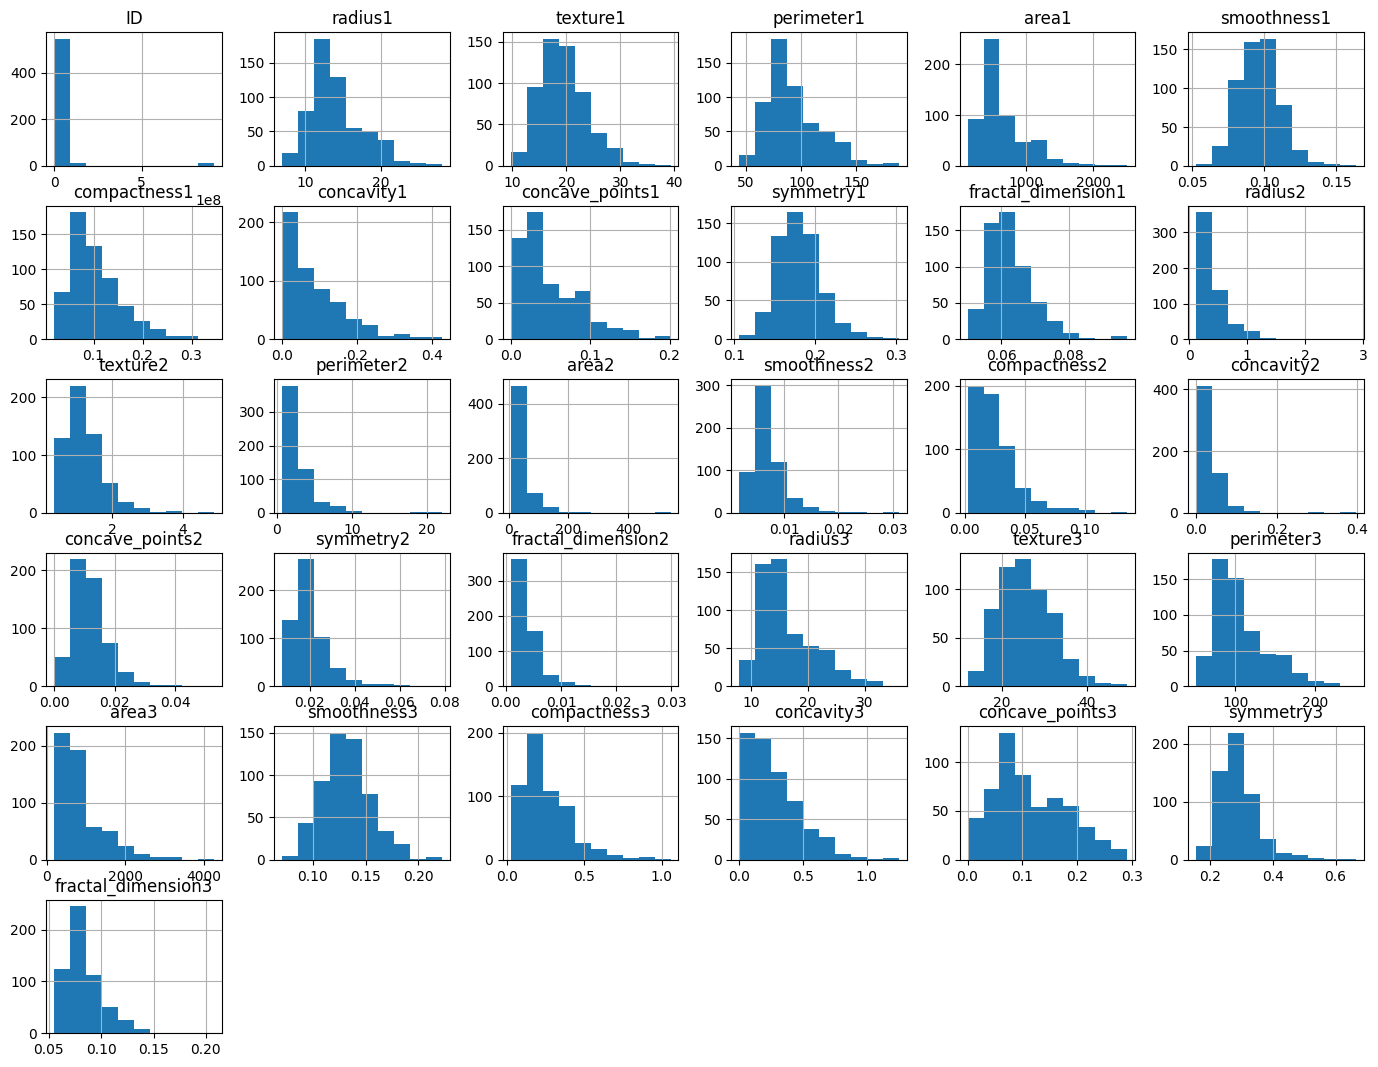

In [20]:
df.hist(figsize=(17,13))
plt.show()

In [21]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [22]:
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [26]:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

In [27]:
svm = SVC(kernel='rbf', probability= True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [28]:
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

In [29]:
def get_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    gmean = np.sqrt(sensitivity * specificity)
    fdr = fp / (fp + tp)
    forate = fn / (fn + tn)
    mcc = matthews_corrcoef(y_true, y_pred)

    return accuracy, sensitivity, specificity, gmean, fdr, forate, mcc

In [30]:
train_knn = get_metrics(y_train, y_train_pred_knn)
test_knn  = get_metrics(y_test,  y_test_pred_knn)

In [31]:
train_svm = get_metrics(y_train, y_train_pred_svm)
test_svm  = get_metrics(y_test,  y_test_pred_svm)

In [34]:

print("KNN\n")
print("Training:")
print("Accuracy:", train_knn[0] * 100)
print("Sensitivity:", train_knn[1] * 100)
print("Specificity:", train_knn[2] * 100)
print("G-Mean:", train_knn[3] * 100)
print("FDR:", train_knn[4] * 100)
print("FOR:", train_knn[5] * 100)
print("MCC:", train_knn[6])

print("\nTesting:")
print("Accuracy:", test_knn[0] * 100)
print("Sensitivity:", test_knn[1] * 100)
print("Specificity:", test_knn[2] * 100)
print("G-Mean:", test_knn[3] * 100)
print("FDR:", test_knn[4] * 100)
print("FOR:", test_knn[5] * 100)
print("MCC:", test_knn[6])


print("\nSVM\n\n")
print("Training:")
print("Accuracy:", train_svm[0] * 100)
print("Sensitivity:", train_svm[1] * 100)
print("Specificity:", train_svm[2] * 100)
print("G-Mean:", train_svm[3] * 100)
print("FDR:", train_svm[4] * 100)
print("FOR:", train_svm[5] * 100)
print("MCC:", train_svm[6])

print("\nTesting:")
print("Accuracy:", test_svm[0] * 100)
print("Sensitivity:", test_svm[1] * 100)
print("Specificity:", test_svm[2] * 100)
print("G-Mean:", test_svm[3] * 100)
print("FDR:", test_svm[4] * 100)
print("FOR:", test_svm[5] * 100)
print("MCC:", test_svm[6])


KNN

Training:
Accuracy: 97.8021978021978
Sensitivity: 94.70588235294117
Specificity: 99.64912280701755
G-Mean: 97.14606580369166
FDR: 0.6172839506172839
FOR: 3.0716723549488054
MCC: 0.9532800755680001

Testing:
Accuracy: 95.6140350877193
Sensitivity: 90.47619047619048
Specificity: 98.61111111111111
G-Mean: 94.45611505856924
FDR: 2.564102564102564
FOR: 5.333333333333334
MCC: 0.9058238738943076

SVM


Training:
Accuracy: 98.68131868131869
Sensitivity: 96.47058823529412
Specificity: 100.0
G-Mean: 98.21944218702025
FDR: 0.0
FOR: 2.0618556701030926
MCC: 0.9720159666475798

Testing:
Accuracy: 96.49122807017544
Sensitivity: 92.85714285714286
Specificity: 98.61111111111111
G-Mean: 95.69088792432659
FDR: 2.5
FOR: 4.054054054054054
MCC: 0.9245181185940877
